In [327]:
import tifffile as tf
import zarr
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import numpy as np
from sklearn.metrics import r2_score

In [328]:
channel_io = tf.TiffFile('/Users/swarchol/Downloads/exemplar-001/exemplar-001.ome.tif', is_ome=False)
channels = zarr.open(channel_io.series[0].aszarr())

In [330]:
def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

def adjr2(actual, predicted, rowcount, featurecount):
    """ R2 Score """
    return 1-(1-r2(actual,predicted))*(rowcount-1)/(rowcount-featurecount)

r2: 0.9532402810404275
Error: 0.002608473891507812
Abs Error: 0.027833827440086722
Log Error: 0.0003279557804429806
RMSE: 0.05107322088441077


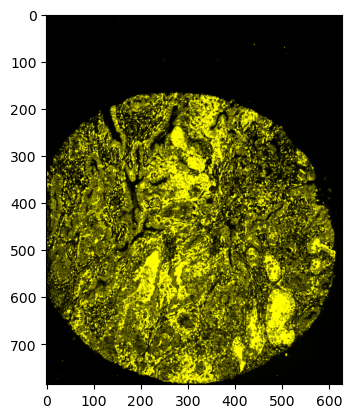

In [338]:

red = np.array([1, 1, 0])
green = np.array([1, 1, 0])
blue = np.array([1, 1, 0])
yellow = np.array([0, 1, 0])
# Max of this dtype
# np.iinfo(ch_0.dtype).max
ch_0 = channels[2][0]
ch_1 = channels[2][9]
ch_2 = channels[2][2]
ch_3 = channels[2][3]
ch_0_contrast_limits = [1483, 53666]
ch_1_contrast_limits = [535, 12510]
ch_2_contrast_limits = [134, 15992]
ch_3_contrast_limits = [420, 3299]
# Apply linear ramp to each channel
ch_0_scaled = np.interp(ch_0, ch_0_contrast_limits, [0, np.iinfo(ch_0.dtype).max]).astype(ch_0.dtype)
ch_1_scaled = np.interp(ch_1, ch_1_contrast_limits, [0, np.iinfo(ch_1.dtype).max]).astype(ch_1.dtype)
ch_2_scaled = np.interp(ch_2, ch_2_contrast_limits, [0, np.iinfo(ch_2.dtype).max]).astype(ch_2.dtype)
ch_3_scaled = np.interp(ch_3, ch_3_contrast_limits, [0, np.iinfo(ch_3.dtype).max]).astype(ch_3.dtype)
# color ch_0 red  operands could not be broadcast together with shapes (785,628) (3,) 
pseudocolored_ch_0 = ch_0_scaled[..., None] / np.iinfo(ch_0.dtype).max * red.reshape(1, 1, 3)
pseudocolored_ch_1 = ch_1_scaled[..., None] / np.iinfo(ch_1.dtype).max * green.reshape(1, 1, 3)
pseudocolored_ch_2 = ch_2_scaled[..., None] / np.iinfo(ch_2.dtype).max * blue.reshape(1, 1, 3)
pseudocolored_ch_3 = ch_3_scaled[..., None] / np.iinfo(ch_3.dtype).max * blue.reshape(1, 1, 3)

# Merge the channels
# pseudocolored = pseudocolored_ch_2 + pseudocolored_ch_1
pseudocolored = pseudocolored_ch_0 + pseudocolored_ch_1 + pseudocolored_ch_2 + pseudocolored_ch_3
# clamp between 0 and 1
pseudocolored = np.clip(pseudocolored, 0, 1)
plt.imshow(pseudocolored)

data = np.column_stack((ch_0_scaled.flatten() 
/ np.iinfo(ch_0_scaled.dtype).max
,ch_1_scaled.flatten()
/ np.iinfo(ch_1_scaled.dtype).max 
,ch_2_scaled.flatten()
/ np.iinfo(ch_2_scaled.dtype).max 
,ch_3_scaled.flatten()
/ np.iinfo(ch_3_scaled.dtype).max
,pseudocolored.reshape(-1, 3)))
# view histograms of the values in the first 3 columns on 3 subplots

# Select 1000 random rows in data where the sum of the first 3 columns is > 0.3
# and plot them as a scatter plot
mask = (data[:, 0] + data[:, 1] + data[:, 2] + data[:, 3]) > 0.3
rows = data[mask]
np.random.shuffle(rows)
rows = rows[:1000]



# Fit a linear model to the data
model = linear_model.LinearRegression()
model.fit(rows[:, :4], rows[:, 4:7])
# Predict the values from the model
pred = model.predict(rows[:, :4])
# Calculate the error
error = mean_squared_error(rows[:, 4:7], pred)
# log_error = mean_squared_log_error(rows[:, 4:7], pred)
# r2
r2 = model.score(rows[:, :4], rows[:, 4:7])
print(f'r2: {r2}')
print(f'Error: {error}')
print(f'Abs Error: {np.abs(pred - rows[:, 4:7]).mean()}')
print(f'Log Error: {log_error}')
rms = np.sqrt(mean_squared_error(rows[:, 4:7], pred))
print(f'RMSE: {rms}')
# Adjusted r2


# Root Mean Square Error





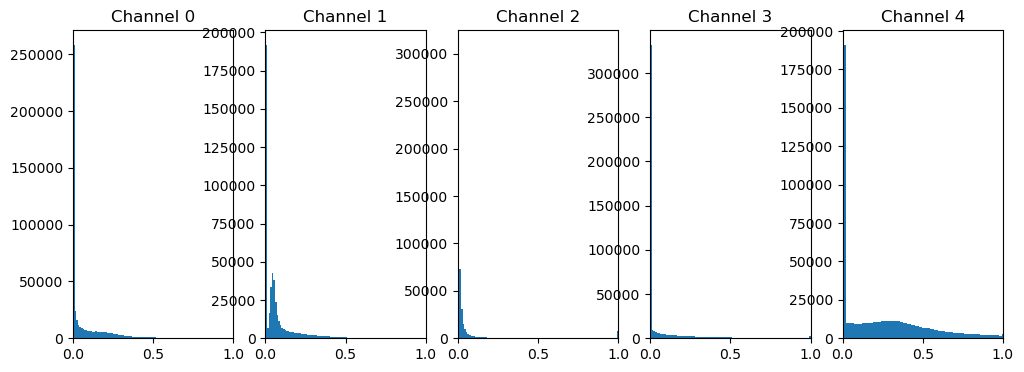

In [319]:
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    if i == 4:
        ax.hist(data[:, 0] + data[:, 1] + data[:, 2] + data[:, 3], bins=100)
        ax.set_title(f'Channel {i}')
        ax.set_xlim(0, 1)
    else:
        ax.hist(data[:, i], bins=100)
        ax.set_title(f'Channel {i}')
        ax.set_xlim(0, 1)
plt.show()

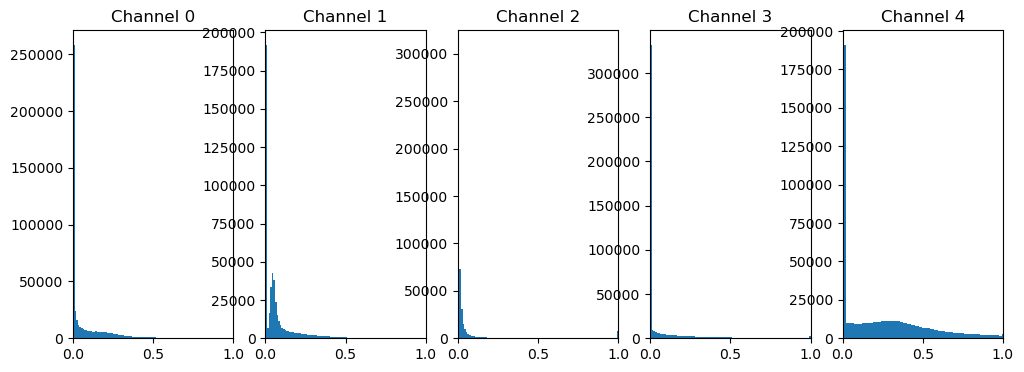

r2: 0.9739577583598648
Error: 0.002070491619616301
Abs Error: 0.01887690291776765
Log Error: 0.0003279557804429806


In [306]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])